In [15]:
#### Synthea Health: Data Analysis and Insights Generation

In [ ]:
!pip install -r requirements.txt

In [17]:
#import the required funcions and packages for EDA

import pandas as pd
from utils.utils import read_data_parse_dates,get_demographic_plot
import json
import plotly.express as px

In [18]:
config_file_path = './config/config.json'

# Load the JSON file
with open(config_file_path, 'r') as file:
    config = json.load(file)

# Access the value of 'input_folder'
output_folder = config.get('cleaned_data_path')
print("output Folder:", output_folder)

output Folder: C://Users//veena.vemula//Documents//GitHub//SDE-Skills-Test//Output


In [47]:
df_phr =  read_data_parse_dates(output_folder,"diagnosis_data",["BIRTHDATE"])
df_patients =  read_data_parse_dates(output_folder,"patients_cleaned",["BIRTHDATE"])
df_encounters =  read_data_parse_dates(output_folder,"encounters_cleaned",["START_ENC","STOP_ENC"])
df_conditions =  read_data_parse_dates(output_folder,"conditions_cleaned",["START_DIAG","STOP_DIAG"])
df_medications =  read_data_parse_dates(output_folder,"medications_cleaned",["START_MED","STOP_MED"])
df_procedures =  read_data_parse_dates(output_folder,"procedures_cleaned",["START_PROC","STOP_PROC"])


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

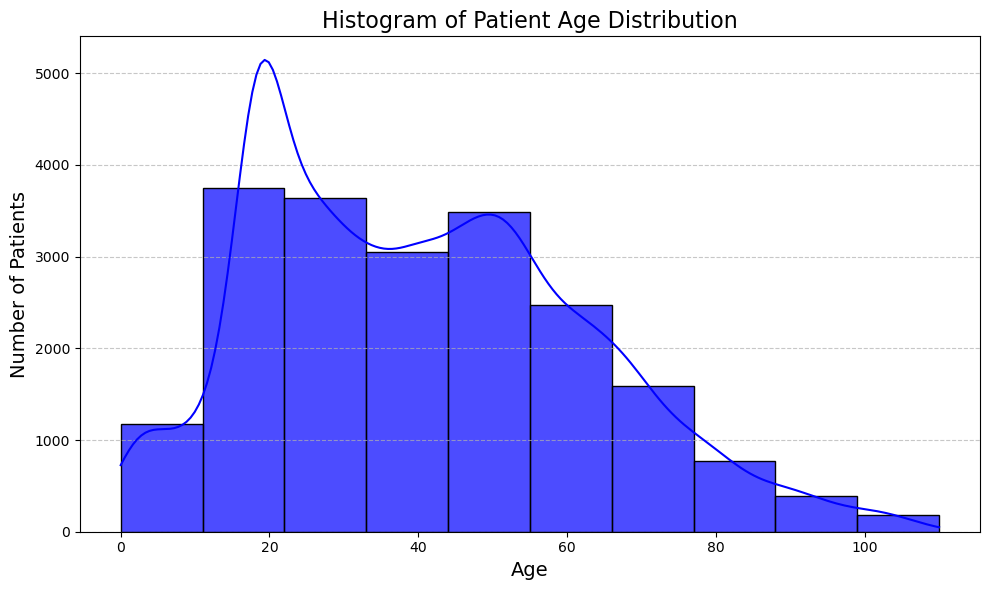

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_phr['age_diag'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of Patient Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
patient_counts_by_diagnosis = df_phr.groupby('DESCRIPTION')['PATIENT_ID'].nunique()
patient_counts_sorted = patient_counts_by_diagnosis.sort_values(ascending=False)

print(patient_counts_sorted.head(30))


DESCRIPTION
Stress (finding)                                    894
Viral sinusitis (disorder)                          739
Limited social contact (finding)                    661
Social isolation (finding)                          653
Acute viral pharyngitis (disorder)                  506
Not in labor force (finding)                        501
Victim of intimate partner abuse (finding)          466
Body mass index 30+ - obesity (finding)             463
Acute bronchitis (disorder)                         454
Prediabetes                                         341
Anemia (disorder)                                   324
Hypertension                                        292
Risk activity involvement (finding)                 289
Normal pregnancy                                    217
Chronic sinusitis (disorder)                        216
Has a criminal record (finding)                     206
Miscarriage in first trimester                      204
Chronic low back pain (finding)     

In [43]:
top_15_diagnoses = df_phr.groupby('DESCRIPTION').size().sort_values(ascending = False).head(15)
# Replace diagnoses not in top 15 with "Others"
GroupedDiagnosis = df_phr['DESCRIPTION'].apply(
    lambda x: x if x in top_15_diagnoses else 'Others'
)
GroupedDiagnosis.value_counts()

DESCRIPTION
Others                                        5994
Stress (finding)                              5137
Social isolation (finding)                    1243
Viral sinusitis (disorder)                    1233
Limited social contact (finding)              1200
Not in labor force (finding)                  1077
Victim of intimate partner abuse (finding)     819
Acute viral pharyngitis (disorder)             678
Acute bronchitis (disorder)                    571
Normal pregnancy                               527
Body mass index 30+ - obesity (finding)        463
Risk activity involvement (finding)            392
Prediabetes                                    341
Anemia (disorder)                              324
Hypertension                                   292
Chronic sinusitis (disorder)                   219
Name: count, dtype: int64

C:\Users\veena.vemula\AppData\Local\Temp\ipykernel_8680\1839777875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_diagnoses.values, y=top_15_diagnoses.index, palette='viridis')


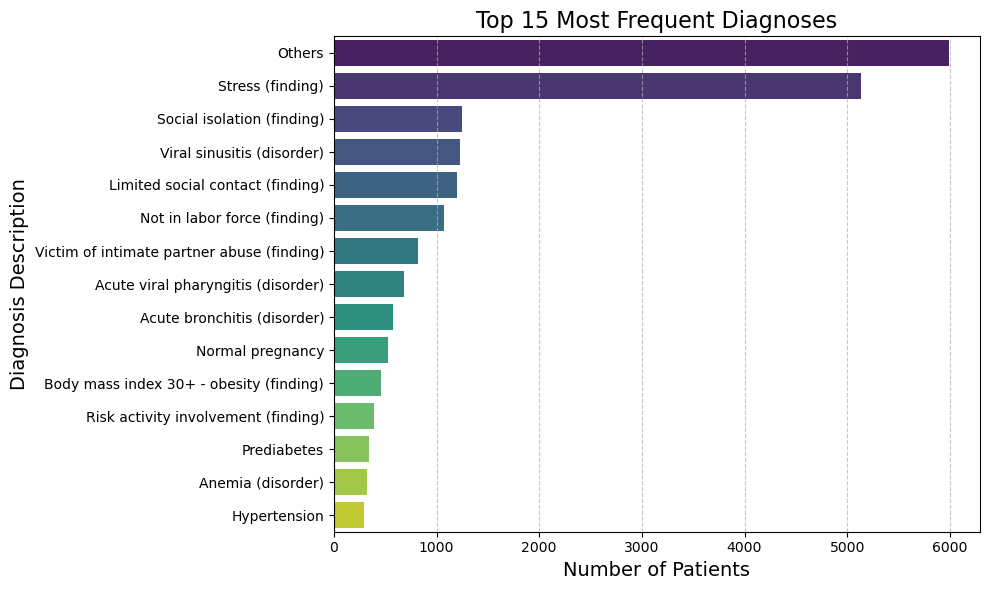

In [45]:
top_15_diagnoses = GroupedDiagnosis.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_diagnoses.values, y=top_15_diagnoses.index, palette='viridis')

plt.title('Top 15 Most Frequent Diagnoses', fontsize=16)
plt.xlabel('Number of Patients', fontsize=14)
plt.ylabel('Diagnosis Description', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


C:\Users\veena.vemula\AppData\Local\Temp\ipykernel_8680\467863593.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



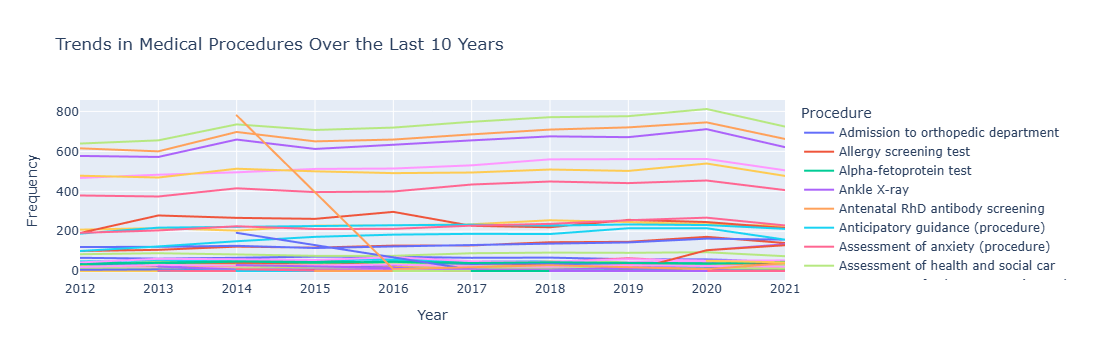

In [51]:
# Filter procedures for the last 10 years
current_year = df_procedures['Year'].max()
last_10_years = current_year - 9
df_procedures_last_10_years = df_procedures[df_procedures['Year'] >= last_10_years]

# Shorten procedure descriptions for clarity
df_procedures_last_10_years["DESCRIPTION_SHORT"] = df_procedures_last_10_years['DESCRIPTION'].str.slice(0, 35)

# Group by year and procedure description
procedure_trends_last_10_years = (
    df_procedures_last_10_years.groupby(['Year', 'DESCRIPTION_SHORT'])
    .size()
    .reset_index(name='Count')
)

# Create the line chart
fig = px.line(
    procedure_trends_last_10_years,
    x='Year',
    y='Count',
    color='DESCRIPTION_SHORT',
    line_group='DESCRIPTION_SHORT',
    title='Trends in Medical Procedures Over the Last 10 Years',
    labels={'Year': 'Year', 'DESCRIPTION_SHORT': 'Procedure', 'Count': 'Frequency'}
)

# Save and show the visualization
fig.write_html("./output/data_visualization/trend_procedure_last_10_years.html")
fig.show()


C:\Users\veena.vemula\AppData\Local\Temp\ipykernel_8680\4255781222.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



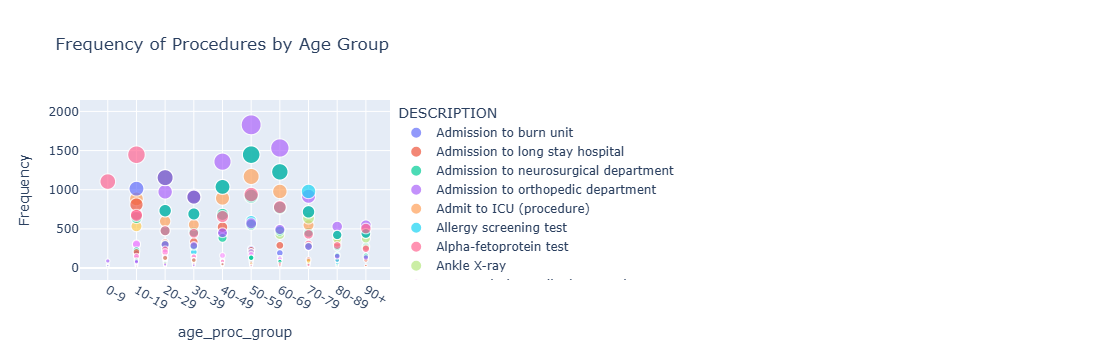

In [55]:
## scatter plot
df_proc_pat = pd.merge(df_procedures,df_patients,on ="PATIENT_ID",how="left")
df_proc_pat["Procedure_age"] = df_proc_pat["START_PROC"].dt.year-df_proc_pat["BIRTHDATE"].dt.year
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]  # Add infinity for 90+
labels = [f"{bins[i]}-{bins[i + 1] - 1}" for i in range(len(bins) - 2)] + [f"{bins[-2]}+"]
df_proc_pat['age_proc_group'] = pd.cut(df_proc_pat['Procedure_age'], bins=bins, labels=labels, right=False)
df_group_proc_age = df_proc_pat[["age_proc_group","DESCRIPTION"]].groupby(["age_proc_group","DESCRIPTION"]).size().reset_index().rename({0:"frequency"},axis=1)
df_group_proc_age[df_group_proc_age["frequency"]!=0]

fig = px.scatter(
    df_group_proc_age,
    x='age_proc_group',               # X-axis: Age groups
    y='frequency',               # Y-axis: Frequency of procedures
    color='DESCRIPTION',           # Color by procedure type
    size='frequency',            # Bubble size (optional)
    title='Frequency of Procedures by Age Group',
    labels={'frequency': 'Frequency', 'age_group': 'Age Group'}
)
fig.show()
fig.write_html("./output/data_visualization/scatter_diag_freq.html")
## social care needs were more in people over 60 age group
## immunotherapy was more in young people 10 to 20
## assessment of substance used procedure is seen across all group

In [57]:
df_encounters.head(2)

,Id,START_ENC,STOP_ENC,PATIENT_ID,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,LENGTH_OF_STAY,Year,Month
0,748f8357-6cc7-551d-f31a-32fa2cf84126,2019-02-17 05:07:38+00:00,2019-02-17 05:22:38+00:00,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,f7ae497d-8dc6-3721-9402-43b621a4e7d2,82608ebb-037c-3cef-9d34-3736d69b29e8,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,410620009,Well child visit (procedure),129.16,877.79,833.9,NaN,NaN,0.01,2019,2
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,2019-03-24 05:07:38+00:00,2019-03-24 05:22:38+00:00,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,f7ae497d-8dc6-3721-9402-43b621a4e7d2,82608ebb-037c-3cef-9d34-3736d69b29e8,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,410620009,Well child visit (procedure),129.16,269.68,256.2,NaN,NaN,0.01,2019,3


In [ ]:
## number of visit by time
#from encounter data if i see multiple entries for patientid 1 shall take all or count for this patient is 1

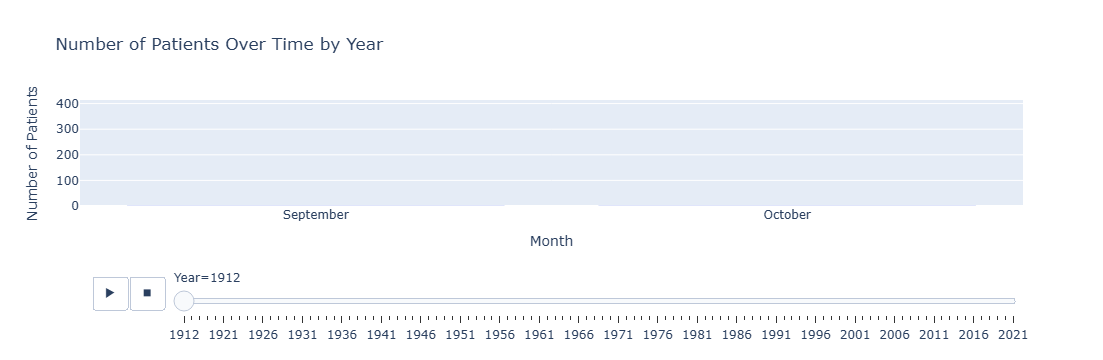

In [61]:
# Combine year and month into a datetime column
df_encounters['date'] = pd.to_datetime(df_encounters[['Year', 'Month']].assign(day=1))  # Assume day=1

# Count unique patient IDs over time
patients_over_time = df_encounters.groupby(['Year', 'Month']).agg(num_patients=('PATIENT_ID', 'nunique')).reset_index()

# Create a slider
fig = px.bar(
    patients_over_time,
    x='Month',
    y='num_patients',
    animation_frame='Year',  # Enables the slider for years
    title='Number of Patients Over Time by Year',
    labels={'month': 'Month', 'num_patients': 'Number of Patients'},
    range_y=[0, patients_over_time['num_patients'].max() + 5]  # Adjust Y-axis range for clarity
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']),
    transition={'duration': 500}  # Smooth transition between frames
)

fig.show()
fig.write_html("./output/data_visualization/slider_patients_visit_overtime.html")
## spike of patient visist seen in 2021 covid years

In [ ]:
# •	Calculate mean, median, and standard deviation for numerical columns (e.g., age, frequency of visits).

In [87]:
df_pat_cond = pd.merge(df_conditions, df_patients, on='PATIENT_ID', how='inner')

In [89]:
aga_diag_mean = df_pat_cond["age_diag"].mean()
aga_diag_median = df_pat_cond["age_diag"].median()
aga_diag_std = df_pat_cond["age_diag"].std()
fig = px.bar( x=["Age_mean","Age_median","Age_std"],y=[aga_diag_mean,aga_diag_median,aga_diag_std], title="Mean Median Std of Age",
              color_continuous_scale='Viridis')
#fig.write_html("./output/data_visualization/top_patient_by_visit.html")
fig.show()


KeyError: 'age_diag'